# Stock price prediction using historical data

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [10]:
# sample historical stock price data
data={
    'Date':pd.date_range(start='2024-01-01',periods=10,freq='D'),
    'Close':[150,152,153,155,154,156,157,158,159,160]
}
#convert the dataset into Dataframe 
df=pd.DataFrame(data)

df['Date']=df['Date'].map(pd.Timestamp.toordinal)

print('stock price data :')
print(df.head())

stock price data :
     Date  Close
0  738886    150
1  738887    152
2  738888    153
3  738889    155
4  738890    154


In [12]:
x=df[['Date']]
y=df['Close']
#split dataset into train test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [16]:
#prediction
y_pred=model.predict(x_test)

In [18]:
#evaluate the model
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_pred,y_test)
print(mse)
print(r2)

0.06023335316288063
0.9956267258035456


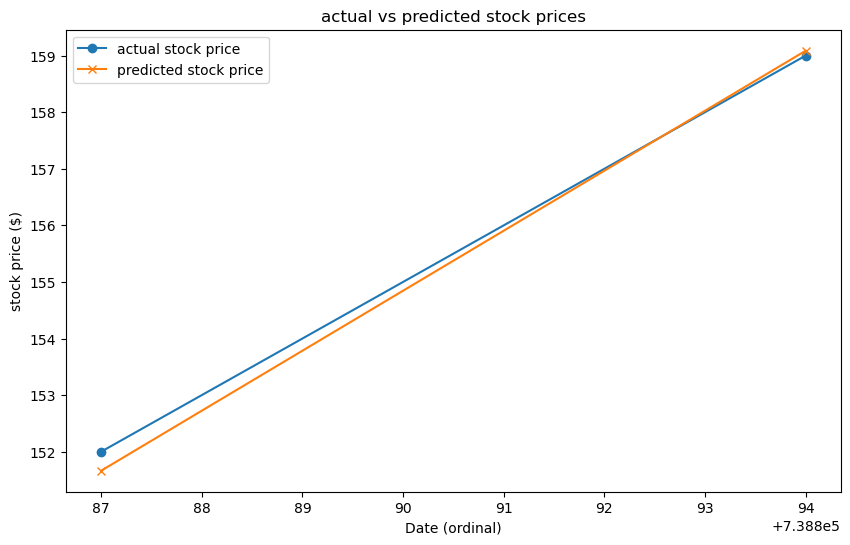

In [22]:
#plot the actual vs predict the stock prices
plt.figure(figsize=(10,6))
plt.plot(x_test,y_test,label="actual stock price",marker='o')
plt.plot(x_test,y_pred,label='predicted stock price',marker='x')
plt.title('actual vs predicted stock prices')
plt.xlabel("Date (ordinal)")
plt.ylabel("stock price ($)")
plt.legend()
plt.show()

In [24]:
future_data=pd.Timestamp('2024-01-11').toordinal()
future_date=pd.DataFrame({'Date':[future_date]})
predicted_price=model.predict(future_data)
print(f'predicted stock price: ${predicted_price[0]:.2f}')

NameError: name 'future_date' is not defined